**NOTES**
* Check out the models exceeding no info baseline.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

In [2]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

In [3]:
#results = pd.read_csv(
#    './../../data_source/results/original_images/results_all_features_original_images.csv',
#    index_col=0
#)
results = pd.read_csv(
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    index_col=0
)

In [43]:
#list(np.unique(orig_results['experiment_id'].values))

# Fisher Scoring & Decision Tree

In [4]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
fisher_dtree_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

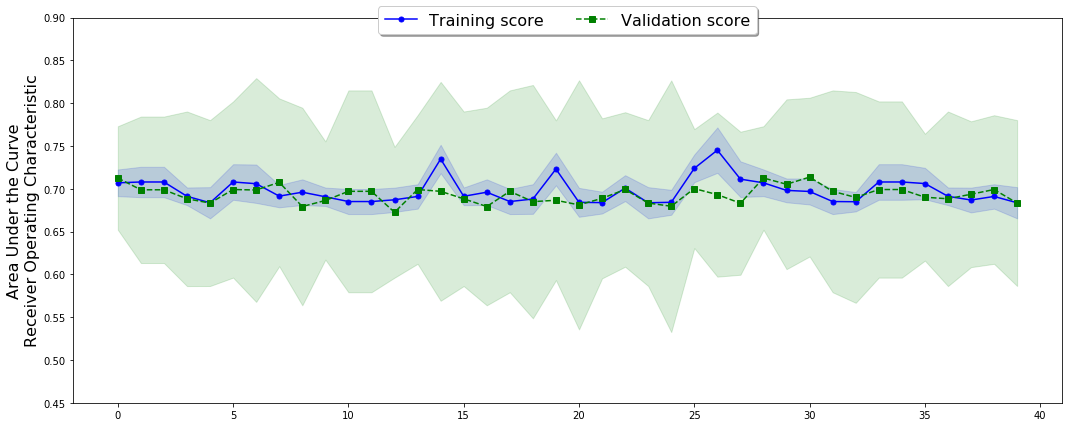

In [5]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_dtree_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [6]:
# Fisher Dtree from original data:
# * num_features = 25.825
# * citerion = gini
# * max_depth = 20
# * max_features = nan/auto
# * min_samples_leaf = 0.21225229310675112

# Fisher Dtree from removed broken slices:
# * num_features = 25.1
# * citerion = gini
# * max_depth = 10
# * max_features = auto
# * min_samples_leaf = 0.20253852214278184

for var_label in list(fisher_dtree_results.filter(regex=estimator_name).columns):
    var = np.copy(fisher_dtree_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 25, 'entropy': 15})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({'5': 14, '10': 10, 'none': 9, '20': 7})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'auto': 13, 'none': 11, 'sqrt': 9, 'log2': 7})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.23620824514494945: 4, 0.24028081186637515: 3, 0.23872877914489296: 3, 0.1988429453871957: 3, 0.14787343359279398: 2, 0.1858849567887828: 2, 0.2141432655327389: 2, 0.21310200401593096: 2, 0.19522001721471352: 1, 0.1896871154127279: 1, 0.24440957308022754: 1, 0.1893449980687909: 1, 0.15619467386168934: 1, 0.2445529137686893: 1, 0.1200709428436944: 1, 0.24338187898

In [7]:
np.mean(var)

0.20253852214278184

In [8]:
np.mean(fisher_dtree_results['FisherScoreSelection__num_features'])

25.1

Text(0.5, 0, 'Experimet')

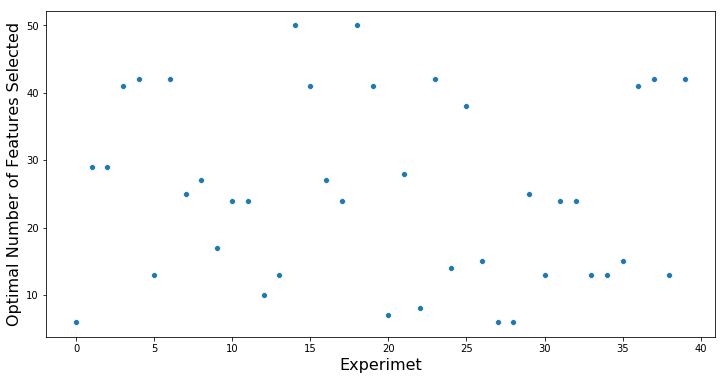

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    np.arange(fisher_dtree_results['FisherScoreSelection__num_features'].size),
    fisher_dtree_results['FisherScoreSelection__num_features']
)
plt.ylabel('Optimal Number of Features Selected', fontsize=16)
plt.xlabel('Experimet', fontsize=16)

# ChiSquareSelection & DTreeEstimator

In [53]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'DTreeEstimator'
chi2_dtree_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

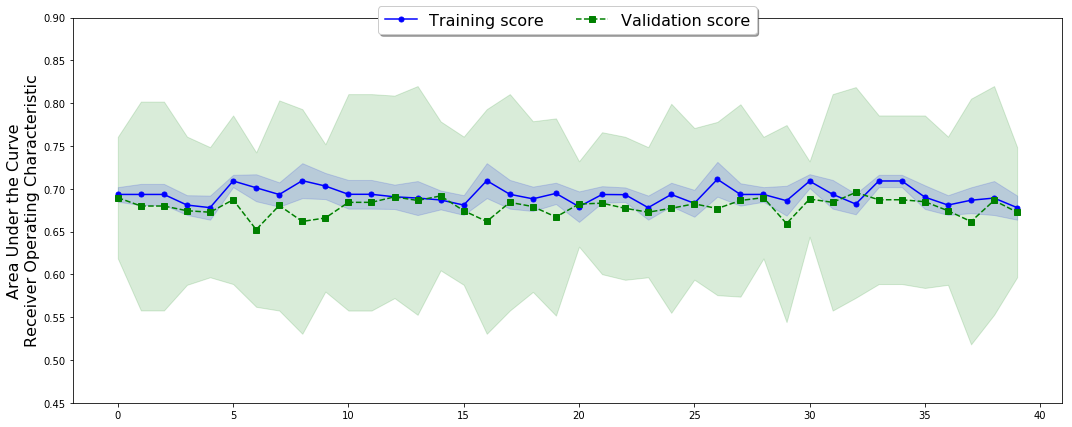

In [54]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_dtree_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [55]:
# Chi2 Dtree original data:
# * citerion = gini
# * max_depth = None
# * max_features = nan/log2
# * min_samples_leaf = 0.19995905313618395

# Chi2 Dtree removed broken slices:
# * citerion = gini
# * max_depth = 10
# * max_features = sqrt
# * min_samples_leaf = 0.20772881571207416

for var_label in list(chi2_dtree_results.filter(regex=estimator_name).columns):
    var = np.copy(chi2_dtree_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 24, 'gini': 16})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({'20': 16, 'none': 9, '10': 8, '5': 7})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'none': 11, 'sqrt': 11, 'log2': 10, 'auto': 8})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.18929706132709626: 4, 0.2383404781852836: 3, 0.2356087150597292: 3, 0.12672150074828165: 3, 0.20646005132748865: 2, 0.20693329781356715: 2, 0.1910258966581032: 2, 0.19394204550524569: 2, 0.19627664270479067: 1, 0.20785791979119134: 1, 0.12672436500697432: 1, 0.20502855215827004: 1, 0.2254170791746298: 1, 0.22151237730804765: 1, 0.21885808249775035: 1, 0.23960400

In [56]:
np.mean(var)

0.19995905313618395

# Chi Square and RF

In [57]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'RFEstimator'
chi2_rf_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

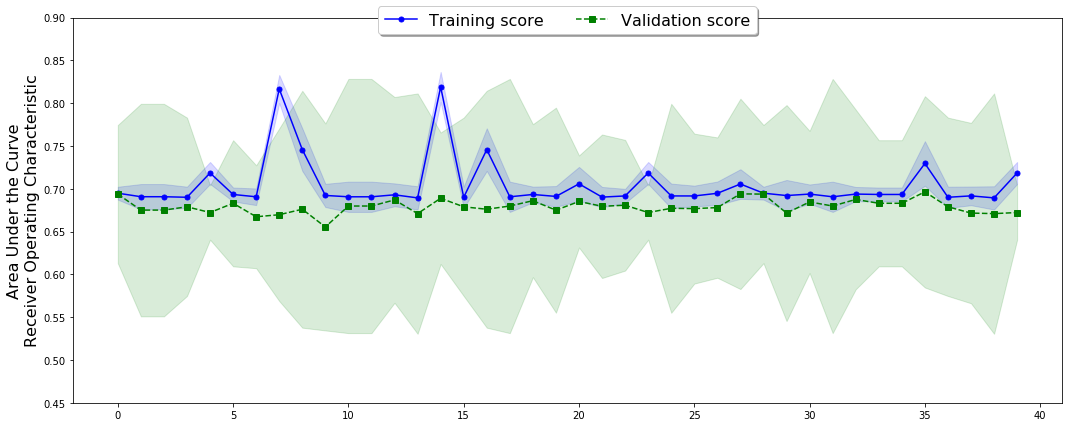

In [58]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_rf_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [59]:
# Chi2 Dtree original data:
# * citerion = gini
# * max_depth = 10
# * max_features = None 
# * min_samples_leaf = 0.17071844493346566
# * n_estimator = 537.2

# Chi2 Dtree removed broken slices:
# * citerion = gini
# * max_depth = 5
# * max_features = None
# * min_samples_leaf = 0.11576587869788717
# * n_estimator = 560.95

for var_label in list(chi2_rf_results.filter(regex=estimator_name).columns):
    var = np.copy(chi2_rf_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 23, 'entropy': 17})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({'10': 18, '5': 12, 'none': 7, '20': 3})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'none': 29, 'sqrt': 7, 'auto': 4})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.18846827011787226: 4, 0.2085241650186997: 3, 0.1134587509673392: 3, 0.20591483860488224: 3, 0.16959860751562272: 2, 0.186037160142265: 2, 0.08268086568025244: 2, 0.23215262886272306: 2, 0.1881948611463853: 1, 0.059781272632757225: 1, 0.23092698485405905: 1, 0.2146775387250732: 1, 0.03691034423409517: 1, 0.2100361188428513: 1, 0.1826850591107015: 1, 0.09852846718123076: 1, 0

In [60]:
np.mean(chi2_rf_results['RFEstimator__min_samples_leaf'])

0.17071844493346566

In [61]:
np.mean(np.mean(chi2_rf_results['RFEstimator__n_estimators']))

537.2